<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análise de Risco de Crédito direcionada por Modelagem Matemática e Estatística
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra código fonte da Tese de Bacharelado do curso de Engenharia de Controle e Automação da UNESP Sorocaba desenvolvido pelo aluno Leonardo Aderaldo Vargas.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Amostra baseada na base de dados do Lending Club Loan Data : https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Lending Club é uma empresa de empréstimos peer-to-peer com sede nos EUA. Eles combinam pessoas que desejam investir dinheiro com pessoas que desejam pedir dinheiro emprestado. Quando os investidores investem o seu dinheiro através do Lending Club, esse dinheiro é repassado aos mutuários e, quando os mutuários pagam os seus empréstimos, o capital mais os juros são repassados ​​aos investidores. É uma vitória para todos, pois podem obter taxas de empréstimo normalmente mais baixas e retornos mais elevados para os investidores.</i>
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>O conjunto de dados Lending Club contém dados completos de empréstimos para todos os empréstimos emitidos entre 2007-2015, incluindo a situação atual do empréstimo (atual, atrasado, totalmente pago, etc.) e as informações de pagamento mais recentes. Os recursos (também conhecidos como variáveis) incluem pontuação de crédito, número de consultas financeiras, endereço incluindo códigos postais e estado, e cobranças, entre outros. As cobranças indicam se o cliente perdeu um ou mais pagamentos e a equipe está tentando recuperar o dinheiro. O arquivo é uma amostra da base de dados exposta.</i>
</p>  





# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [1]:
# Importação das Bibliotecas e Parâmetros de Otimização
from functions import *
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# Spark Session
from pyspark.sql import SparkSession, Row 
#from pyspark.sql.functions import * as F
import pyspark.sql.functions as F
spark = SparkSession.builder.getOrCreate()

# <font color='red' style='font-size: 40px;'> 1. Entendimento da Base de Dados </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 1.1) Descrição da Base de Dados </font>
<hr style='border: 2px solid green;'>

### Variável Target (VALIDADO)

> 1. loan_status: Situação atual do empréstimo, sendo possível classificar o Cliente em Bom ou Ruim (IMPORTANTE)

### Variável ID (VALIDADO)

> 1. member_id: Id do solicitante (IMPORTANTE)


### Variáveis Referentes ao Produto (VALIDADO)

> 1. term: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (IMPORTANTE)

> 2. grade: Grau de empréstimo atribuído (IMPORTANTE)

> 3. sub_grade: Subclasse de empréstimo atribuído (IMPORTANTE)

> 4. purpose: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (IMPORTANTE)

> 5. loan_amnt: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (IMPORTANTE)

> 6. int_rate: Taxa de juros do empréstimo (IMPORTANTE)

> 7. issue_d: Data em que o empréstimo foi financiado (IMPORTANTE)

> 8. policy_code: Flag que indica Produto disponível publicamente ou não (IMPORTANTE)

> 9. pymnt_plan: Flag que indica se um plano de pagamento foi implementado para o empréstimo (IMPORTANTE)

> 10. initial_list_status: Status de listagem inicial do empréstimo. Os valores possíveis são W-F (IMPORTANTE)

> 11. installment: O pagamento mensal devido pelo mutuário se o empréstimo for originado. (Em termos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo.) (IMPORTANTE)

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. emp_title: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. emp_length: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. home_ownership: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. verification_status: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos (IMPORTANTE)

 > 6. annual_inc: Renda anual declarada pelo cliente (IMPORTANTE)

 > 7. addr_state: Estado do Cliente (IMPORTANTE)

 > 8. tot_cur_bal: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 9. total_rev_hi_lim: Limite de rotativos total (IMPORTANTE)
 
 > 10. revol_bal: Limite de rotativos utilizado (IMPORTANTE)

 > 11. revol_util: Taxa de utilização de Limite de rotativos [revol_bal/total_rev_hi_lim] (IMPORTANTE)

 > 12. open_acc: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 14. pub_rec: Número de registros públicos depreciativos (IMPORTANTE)
 
 > 15. inq_last_6mths: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (IMPORTANTE)

 > 16. earliest_cr_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 17. mths_since_last_record: Número de meses desde o último registro público (IMPORTANTE)

 > 18. mths_since_last_major_derog: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 19. mths_since_last_delinq: O número de meses desde a última inadimplência do mutuário (IMPORTANTE)


In [2]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url'], axis = 1)

# <font color='green' style='font-size: 30px;'> 1.2) Definição da Target </font>
<hr style='border: 2px solid green;'>

> 1. A priori, deve-se definir de maneira clara as situações consideradas como Default. Definiu-se um cliente ruim como aquele o qual está em:

- Processo de cobraça ('Charged Off')
- Inadimplente ('Default')
- Atrasado (31 dias ou mais)
- Critérios Mínimos de Aprovação - CMA ('Does not meet the credit policy. Status:Charged Off')
- Possui 1 ou mais contas em inadimplência

> 2. A partir desta definição, deve-se criar a Target mostrando exatamente o que é um cliente Bom ou Ruim 

> 3. Escolheu-se o número "0" para representar o cliente Bom e o número "1" para representar o cliente Ruim, pois o evento de interesse é definir principalmente quem são os Maus Pagadores a fim de evitar ao máximo a inadimplêmcia

> 4. Nota-se que em torno de 88.74% dos clientes são adimplentes, ao passo que 11.26% tornou-se inadimplente

> 5. Esta situação caracteriza um problema de classes desbalanceadas, portanto, isso deve-se ser levado em consideração durante o processo de modelagem e aplicar técnicas para lidar com este tipo de caso

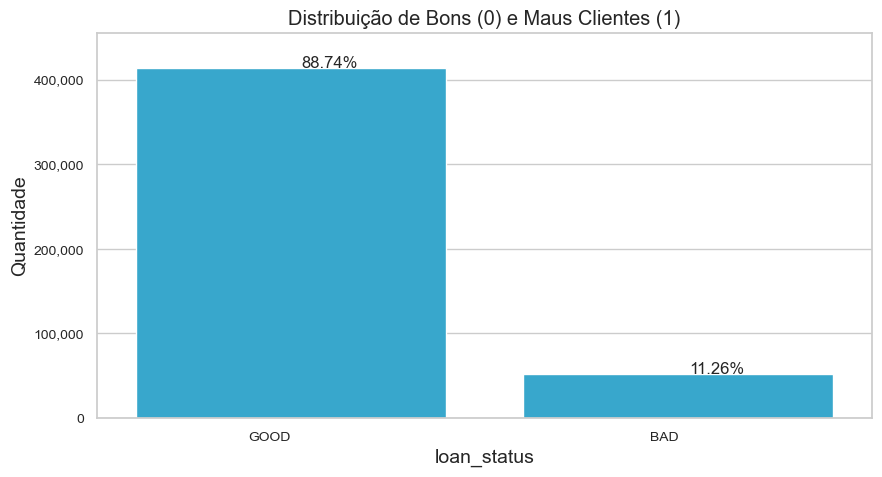

In [3]:
df['loan_status'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['acc_now_delinq'].fillna(0) != 0, 'BAD', 'GOOD') 
plota_barras(['loan_status'], False, df, 1, 1, 'Distribuição de Bons (0) e Maus Clientes (1)', 0)

# <font color='green' style='font-size: 30px;'> 1.3) Separação em Treino e Teste </font>
<hr style='border: 2px solid green;'>

> 1. Antes de realizar qualquer análise ou modelagem, deve-se separar em Treino e Teste a fim de simular um ambiente real

> 2. Ao separar antes de qualquer alteração, evita-se um erro muito grave denominado Data leakage

> 3. As análises serão realizadas unicamente sobre a base de Treinamento, simulando um ambiente real no qual a priori a base de Teste seria inexistente 

In [4]:
df_train = separa_treino_teste('loan_status', df, 0.20)[0]
df_test = separa_treino_teste('loan_status', df, 0.20)[1]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


# <font color='red' style='font-size: 40px;'> 2. Análise de Variáveis Referentes ao Cliente  </font>
<hr style='border: 2px solid red;'>

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. emp_length: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (ANALISE REALIZADA)

 > 2. home_ownership: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (ANALISE REALIZADA)

 > 3. verification_status: Flag que indica se a renda foi comprovada, não comprovada (ANALISE REALIZADA)

 > 4. annual_inc: Renda anual declarada pelo cliente (ANALISE REALIZADA)

 > 5. addr_state: Estado do Cliente (ANALISE REALIZADA)

 > 6. tot_cur_bal: Limite total considerando todos os produtos de crédito (ANALISE REALIZADA)

 > 7. total_rev_hi_lim: Limite de rotativos total (ANALISE REALIZADA)
 
 > 8. revol_bal: Limite de rotativos utilizado (ANALISE REALIZADA)

 > 9. revol_util: Taxa de utilização de Limite de rotativos [revol_bal/total_rev_hi_lim] (ANALISE REALIZADA)

 > 10. open_acc: Número de produtos de crédito atualmente contratados no histórico do cliente (ANALISE REALIZADA)

 > 11. total_acc: Número total de produtos de crédito contratados no histórico do cliente (ANALISE REALIZADA)

 > 12. pub_rec: Número de registros públicos depreciativos (ANALISE REALIZADA)
 
 > 13. inq_last_6mths: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (ANALISE REALIZADA)

 > 14. earliest_cr_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (ANALISE REALIZADA)

 > 15. mths_since_last_record: Número de meses desde o último registro público (ANALISE REALIZADA)

 > 16. mths_since_last_major_derog: Meses desde a classificação mais recente de 90 dias ou menos (ANALISE REALIZADA)

 > 17. mths_since_last_delinq: O número de meses desde a última inadimplência do mutuário (ANALISE REALIZADA)

# <font color='green' style='font-size: 30px;'> 2.1) Número de Anos no emprego atual vs Target </font>
<hr style='border: 2px solid green;'>

> 1. O teste do Chi-Quadrado prova que há associação e o WOE mostra que clientes que estão há menos tempo em seus empregos possuem maior risco.

> 2. Talvez isso ocorra pois a pessoa ainda não tenha se estabilizado na empresa ou ainda não tenha cargos mais altos, portanto, possui salário um pouco menor

Pelo Teste Qui-Quadrado, há associação significativa entre emp_length e loan_status.


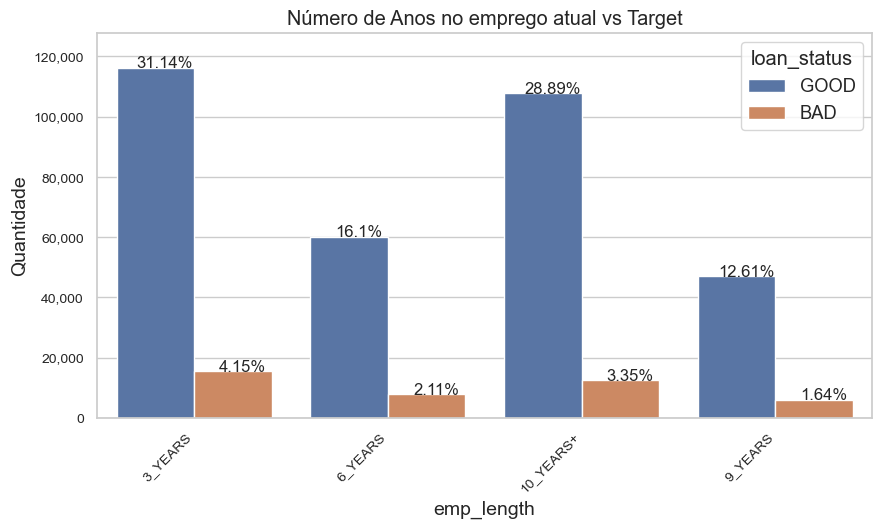

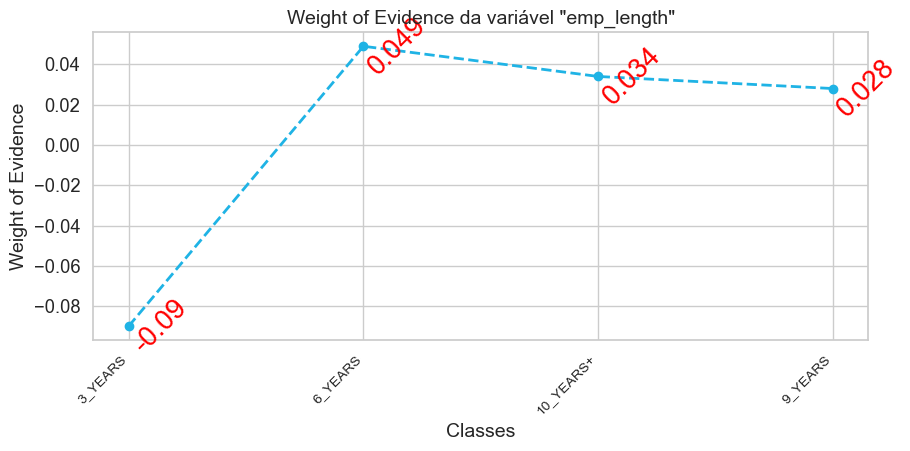

In [5]:
df_aux = df_train[['emp_length', 'loan_status']].copy()
df_aux['emp_length'] = (df_aux['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
df_aux['emp_length'] = df_aux['emp_length'].apply(lambda x:int(x))
df_aux['emp_length'] = np.where(df_aux['emp_length'] <= 3, '3_YEARS', 
                       np.where(df_aux['emp_length'] <= 6, '6_YEARS',
                       np.where(df_aux['emp_length'] <= 9, '9_YEARS',
                       '10_YEARS+')))
teste_hipotese_duas_variaveis_categoricas(df_aux, 'emp_length', 'loan_status')
plota_barras(['emp_length'], 'loan_status', df_aux, 1, 1, 'Número de Anos no emprego atual vs Target', 45)
woe(df_aux, 'emp_length', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.2) Tipo de Residência vs Target </font>
<hr style='border: 2px solid green;'>

> 1. O tipo de residência aparenta ser uma variável com poder discriminativo

> 2. Baseando-se nas categorias Mortgage, Rent e Own, as quais são as únicas que possuem volumetria considerável, percebe-se pelo WOE que clientes de uma casa com Mortgage tendem a oferecer menor risco de inadimplência

Pelo Teste Qui-Quadrado, há associação significativa entre home_ownership e loan_status.


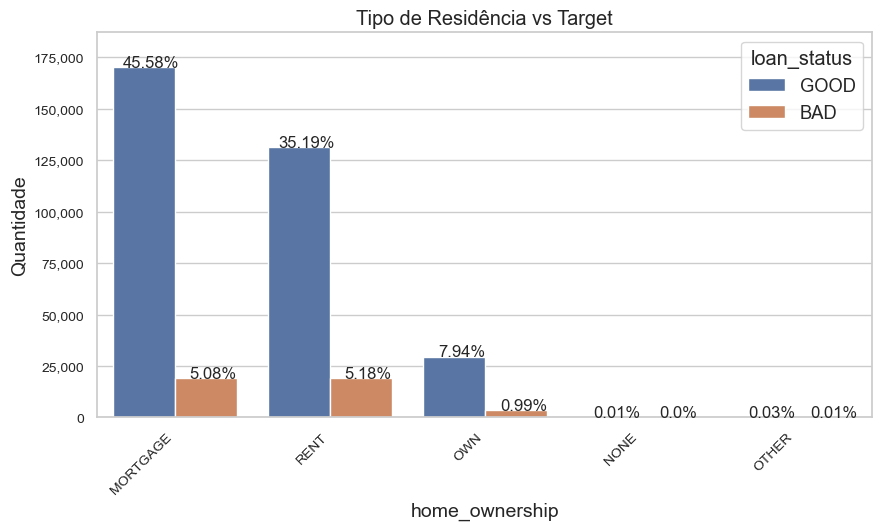

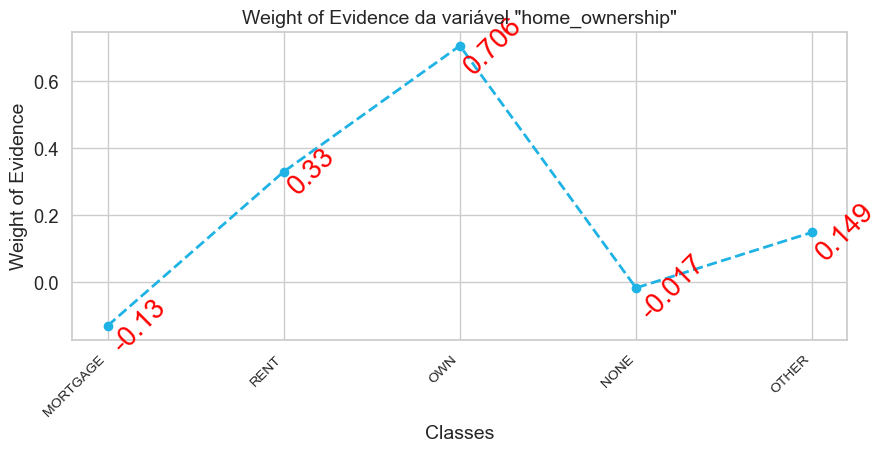

In [6]:
df_aux = df_train.loc[df_train['home_ownership'] != 'ANY'][['home_ownership', 'loan_status']].copy()
teste_hipotese_duas_variaveis_categoricas(df_aux, 'home_ownership', 'loan_status')
plota_barras(['home_ownership'], 'loan_status', df_aux, 1, 1, 'Tipo de Residência vs Target', 45)
woe(df_aux, 'home_ownership', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.3) Comprovação de Renda vs Target </font>
<hr style='border: 2px solid green;'>

> 1. A comprovação de renda é uma variável com forte poder de discriminação

> 2. Clientes de renda comprovada demonstram maior confiabilidade, portanto, o risco de inadimplência torna-se menor nestes casos.

Pelo Teste Qui-Quadrado, há associação significativa entre verification_status e loan_status.


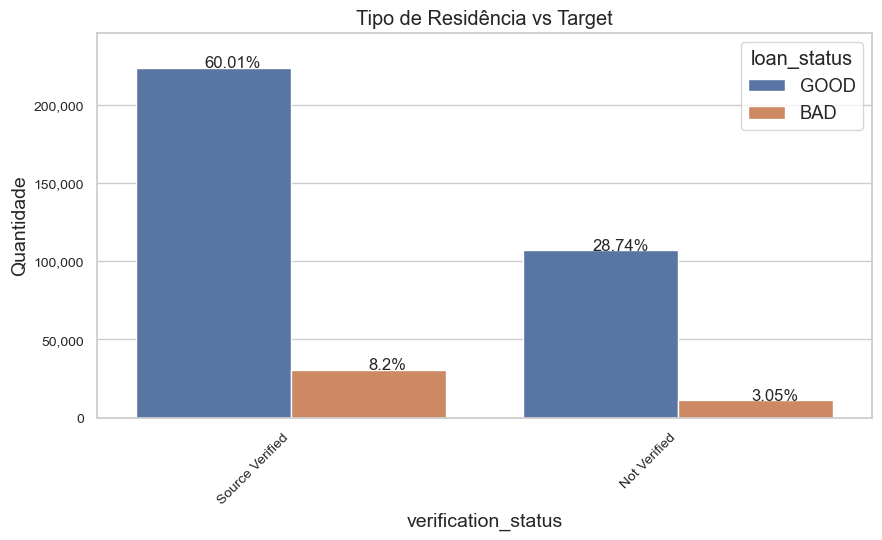

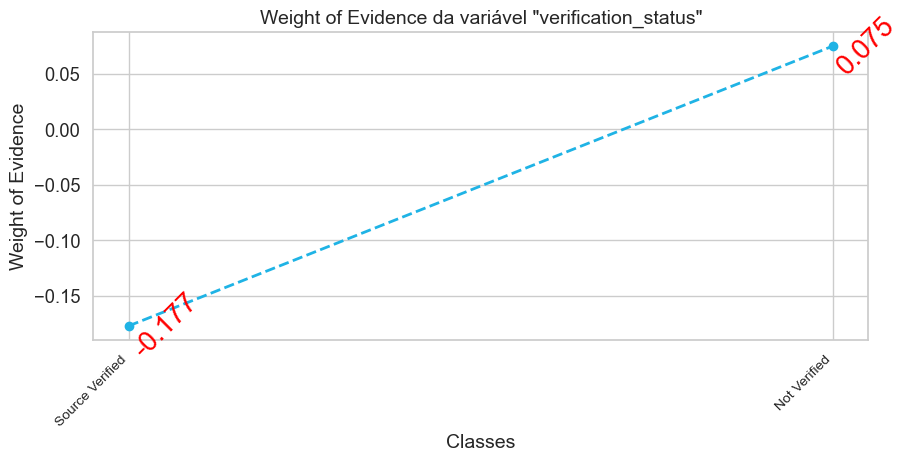

In [7]:
df_aux = df_train[['verification_status', 'loan_status']].copy()
df_aux['verification_status'] = np.where(df_aux['verification_status'].isin(['Not Verified']), 'Not Verified', 'Source Verified')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'verification_status', 'loan_status')
plota_barras(['verification_status'], 'loan_status', df_aux, 1, 1, 'Tipo de Residência vs Target', 45)
woe(df_aux, 'verification_status', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.4) Distribuição do ganho anual vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Como esperado, pessoas com maior faturamento tendem a ter menor inadimplência.

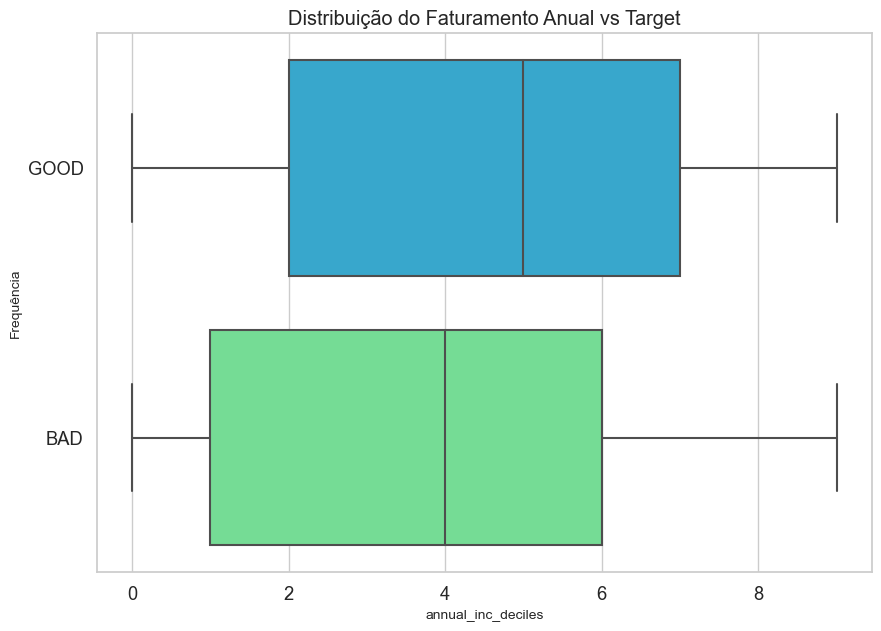

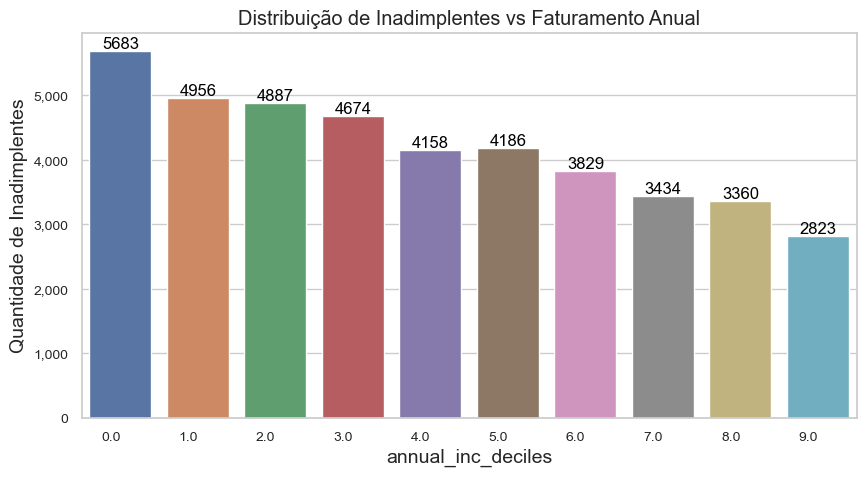

In [8]:
df_aux = df_train[['loan_status', 'annual_inc']].copy()
df_aux['annual_inc_deciles'] = transform_to_deciles(df_aux, 'annual_inc')
plota_boxplot(['annual_inc_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição do Faturamento Anual vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('annual_inc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('annual_inc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'annual_inc_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'annual_inc_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Faturamento Anual')

# <font color='green' style='font-size: 30px;'> 2.5) Distribuição do Limite Total vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Assim como o faturamento, pessoas com maior limite tendem a ter menor inadimplência.

> 2. Na visão de limite de rotativos (limite de cartão de crédito + cheque especial), nota-se esse comportamento nos decis mais altos, ou seja, quem possui grande limite de rotativos

> 3. Todavia, uma informação muito interessante é referente a taxa de utilização de limite de rotativos, a qual mostra que os clientes que utilizam grande parte do seu limite costumam dar mais inadimplências.

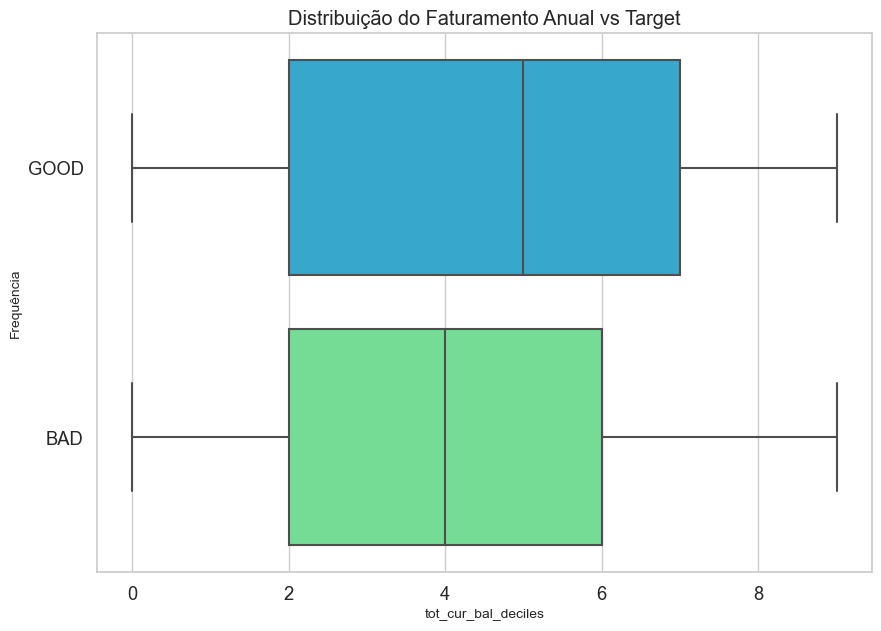

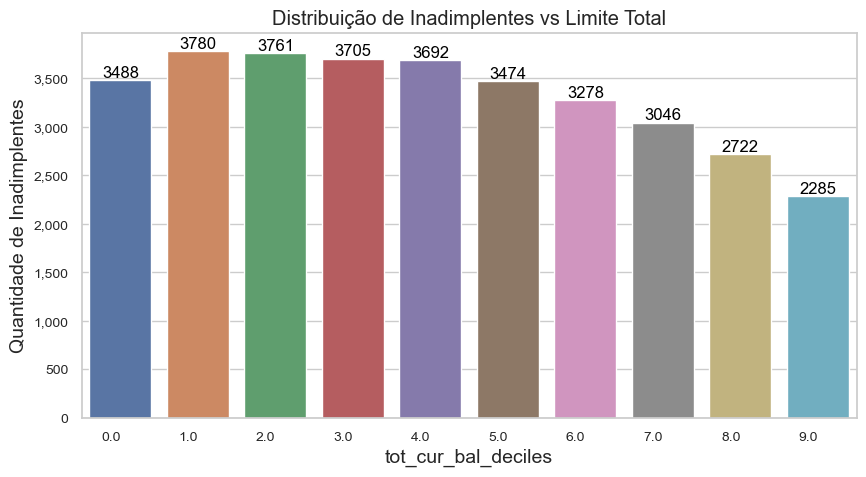

In [9]:
df_aux = df_train[['loan_status', 'tot_cur_bal']].copy()
df_aux['tot_cur_bal_deciles'] = transform_to_deciles(df_aux, 'tot_cur_bal')
plota_boxplot(['tot_cur_bal_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição do Faturamento Anual vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('tot_cur_bal_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('tot_cur_bal_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'tot_cur_bal_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'tot_cur_bal_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Limite Total')

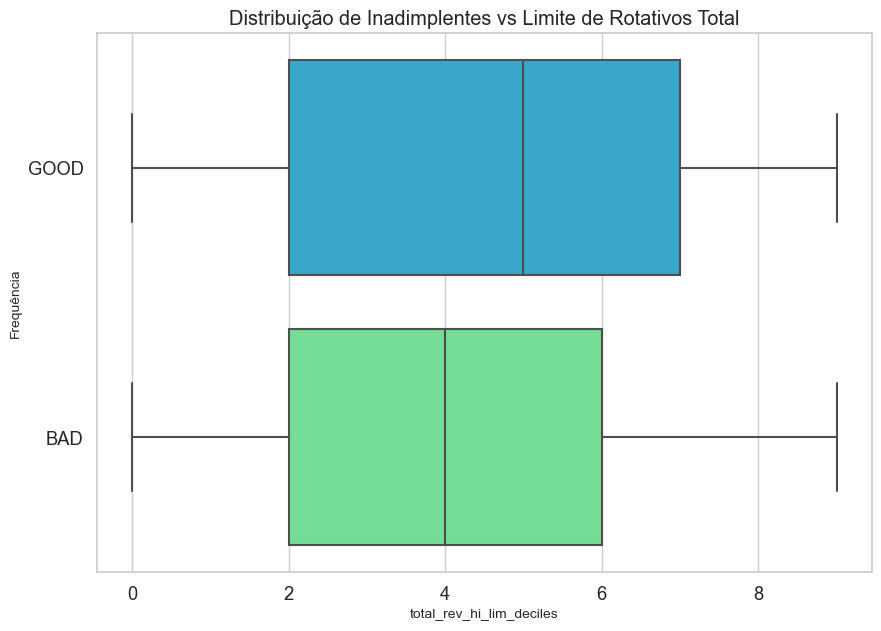

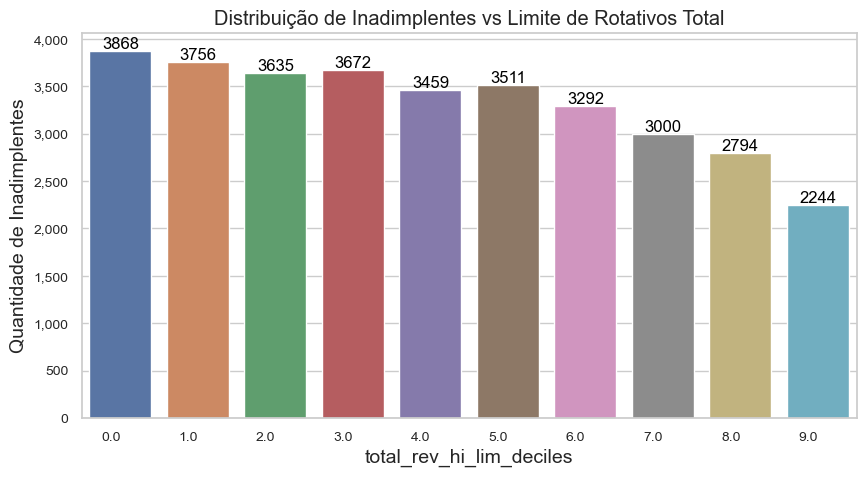

In [10]:
df_aux = df_train[['loan_status', 'total_rev_hi_lim']].copy()
df_aux['total_rev_hi_lim_deciles'] = transform_to_deciles(df_aux, 'total_rev_hi_lim')
plota_boxplot(['total_rev_hi_lim_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Limite de Rotativos Total')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('total_rev_hi_lim_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('total_rev_hi_lim_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'total_rev_hi_lim_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'total_rev_hi_lim_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Limite de Rotativos Total')

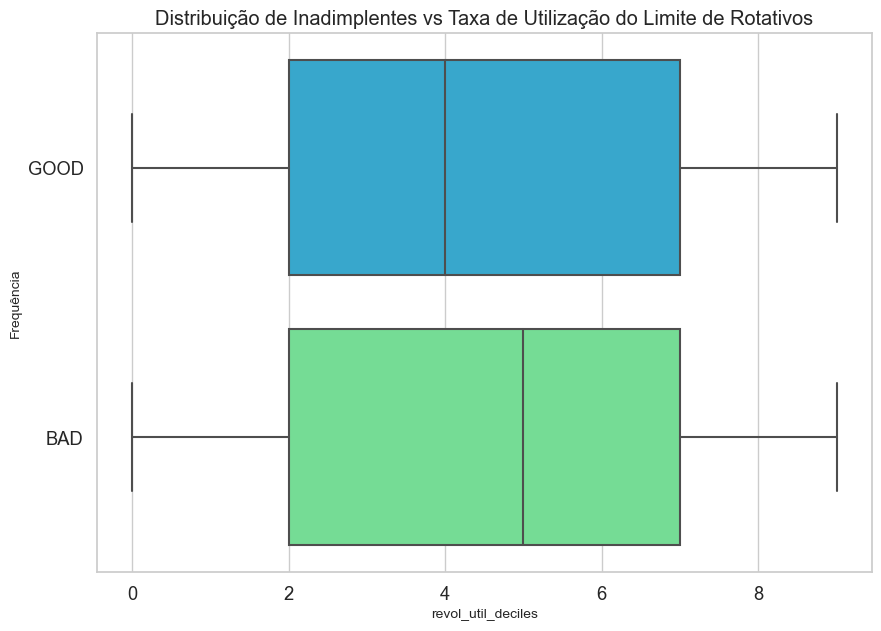

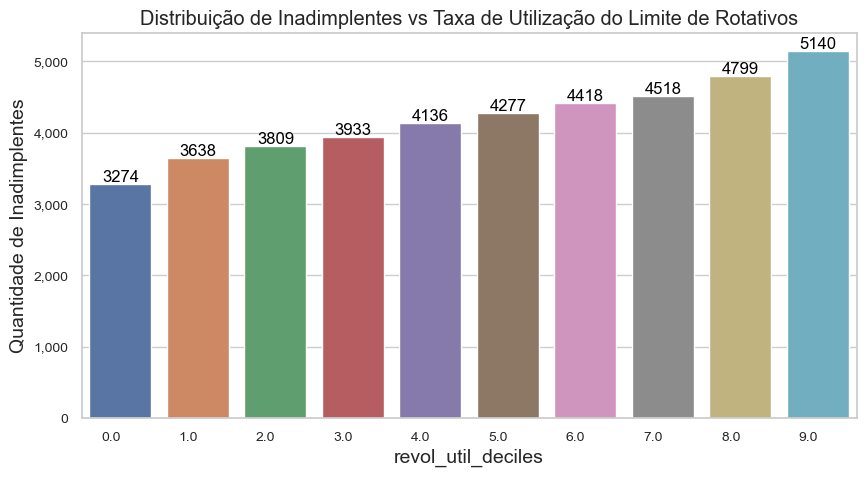

In [11]:
df_aux = df_train[['loan_status', 'revol_util']].copy()
df_aux['revol_util_deciles'] = transform_to_deciles(df_aux, 'revol_util')
plota_boxplot(['revol_util_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Taxa de Utilização do Limite de Rotativos')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('revol_util_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('revol_util_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'revol_util_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'revol_util_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Taxa de Utilização do Limite de Rotativos')

# <font color='green' style='font-size: 30px;'> 2.6) Distribuição do Número de Produtos Contratados vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Em relação ao número de produtos contratados atualmente, nota-se que não há ordenação nos decis, portanto, o fato do cliente ter diversos produtos de crédito contratados simultaneamente não necessariamente significa que ele ficará inadimplente. Na realidade, pode ser que pessoas com maior renda, limite e etc...contratam muitos produtos de uma só vez pois elas tem condições para pagá-los

> 2. Em relação ao número de produtos contratados historicamente, não se nota uma ordenação clara, todavia, clientes concetrados no decil 0 possuem maior inadimplência. O que justificaria isso provavelmente seria que eles são clientes novos e ainda não contrataram muitos produtos, logo, não se sabe muito sobre seu comportamento e, portanto, podemos ter errado ao conceder crédito a alguns.

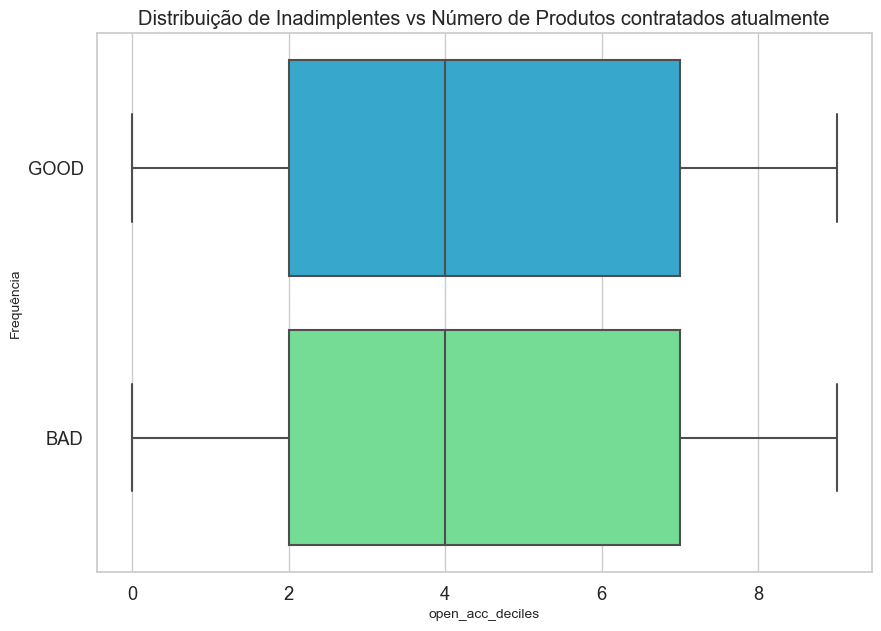

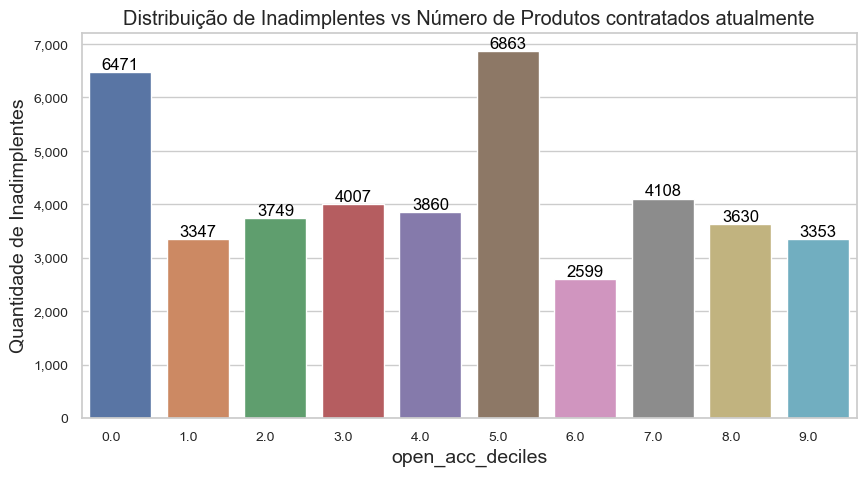

In [12]:
df_aux = df_train[['loan_status', 'open_acc']].copy()
df_aux['open_acc_deciles'] = transform_to_deciles(df_aux, 'open_acc')
plota_boxplot(['open_acc_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Número de Produtos contratados atualmente')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('open_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('open_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'open_acc_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'open_acc_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Número de Produtos contratados atualmente')

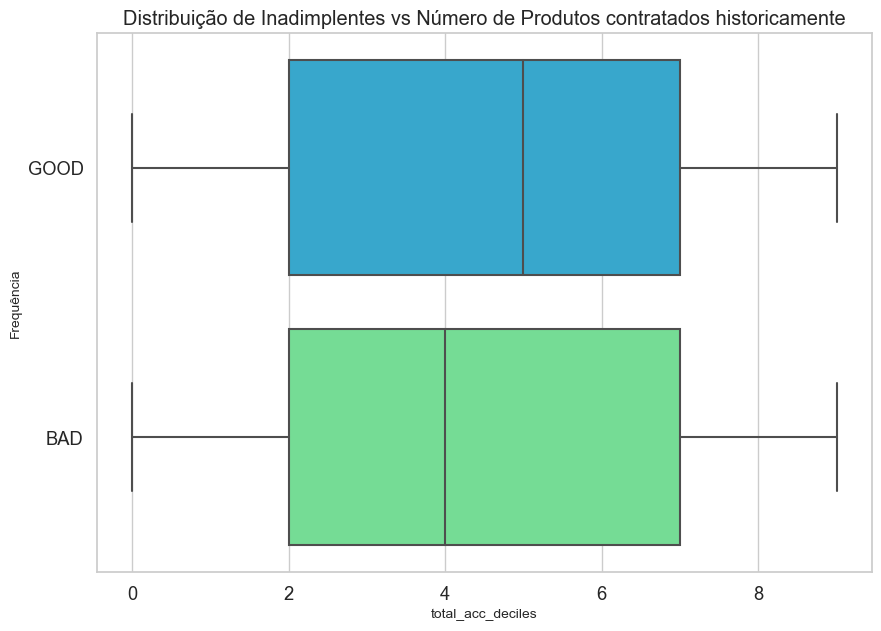

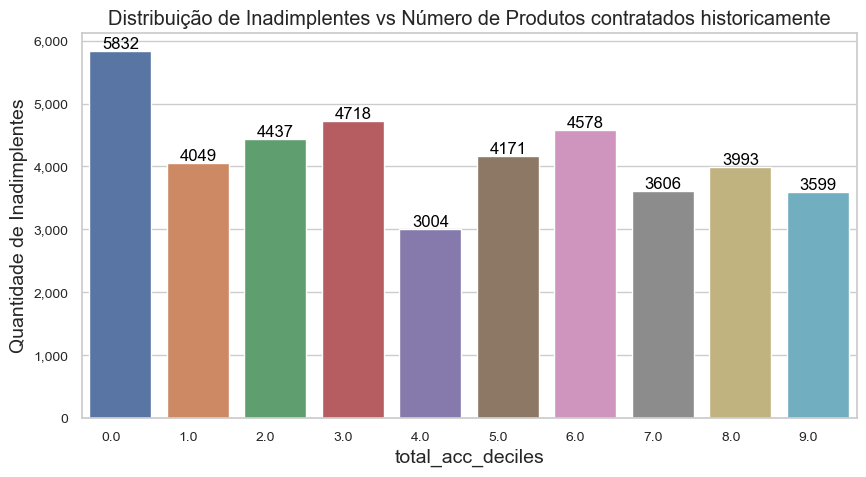

In [13]:
df_aux = df_train[['loan_status', 'total_acc']].copy()
df_aux['total_acc_deciles'] = transform_to_deciles(df_aux, 'total_acc')
plota_boxplot(['total_acc_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Número de Produtos contratados historicamente')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('total_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('total_acc_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'total_acc_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'total_acc_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Número de Produtos contratados historicamente')

# <font color='green' style='font-size: 30px;'> 2.7) Número de Registros Públicos Negativos vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Pessoas com registros negativos tendem a dar maior risco de inadimplência

Pelo Teste Qui-Quadrado, há associação significativa entre pub_rec e loan_status.


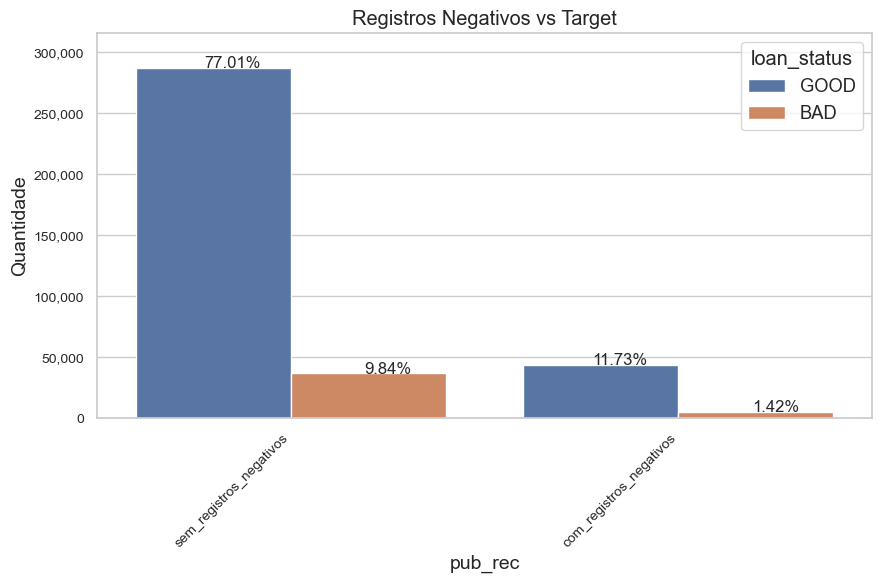

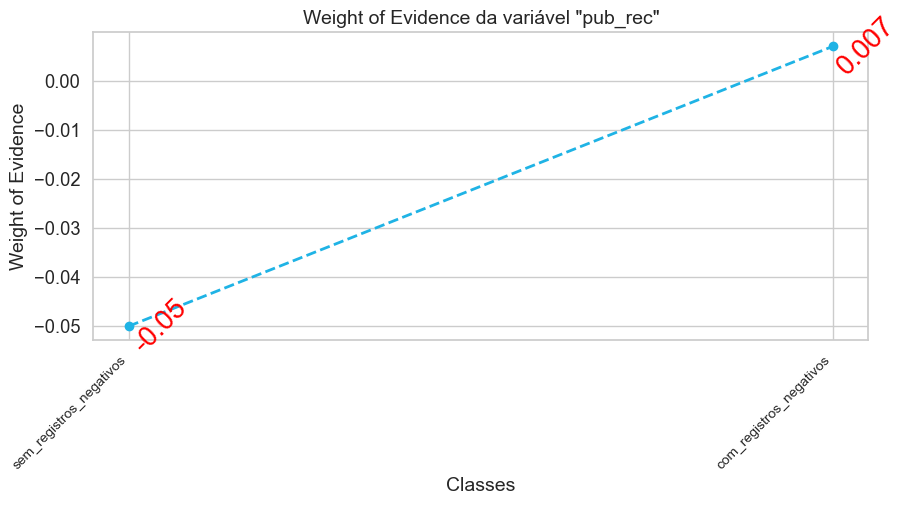

In [14]:
df_aux = df_train[['loan_status', 'pub_rec']].copy()
df_aux[['pub_rec']] = np.where(df_aux[['pub_rec']] == 0, 'sem_registros_negativos', 'com_registros_negativos')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'pub_rec', 'loan_status')
plota_barras(['pub_rec'], 'loan_status', df_aux, 1, 1, 'Registros Negativos vs Target', 45)
woe(df_aux, 'pub_rec', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.8) Consultas de Crédito nos Últimos 6 Meses vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Clientes que realizaram consultas de crédito nos últimos 6 meses tendem a dar menor risco de crédito, pois provavelmente são pessoas interessadas e que vem se planejando há algum tempo

Pelo Teste Qui-Quadrado, há associação significativa entre inq_last_6mths e loan_status.


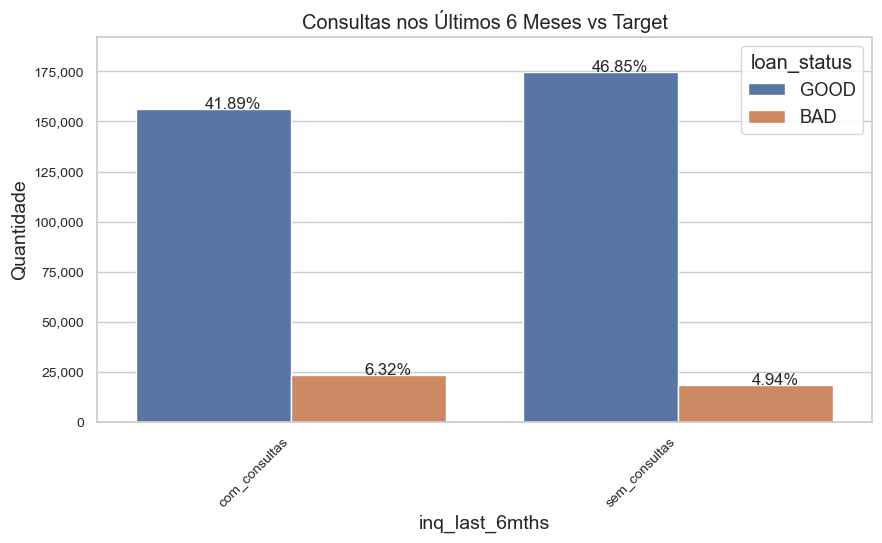

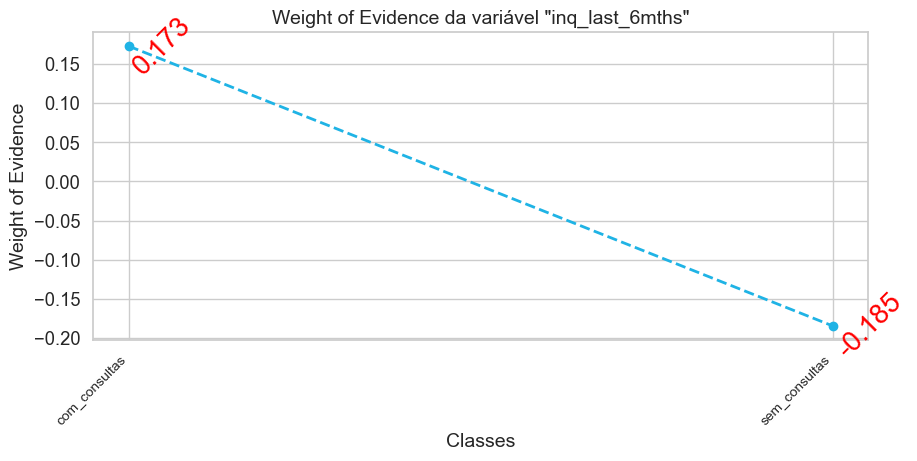

In [15]:
df_aux = df_train[['loan_status', 'inq_last_6mths']].copy()
df_aux[['inq_last_6mths']] = np.where(df_aux[['inq_last_6mths']] == 0, 'sem_consultas', 'com_consultas')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'inq_last_6mths', 'loan_status')
plota_barras(['inq_last_6mths'], 'loan_status', df_aux, 1, 1, 'Consultas nos Últimos 6 Meses vs Target', 45)
woe(df_aux, 'inq_last_6mths', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.9) O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente clientes com inadimplência vencida proporcionam maior risco.

Pelo Teste Qui-Quadrado, há associação significativa entre delinq_2yrs e loan_status.


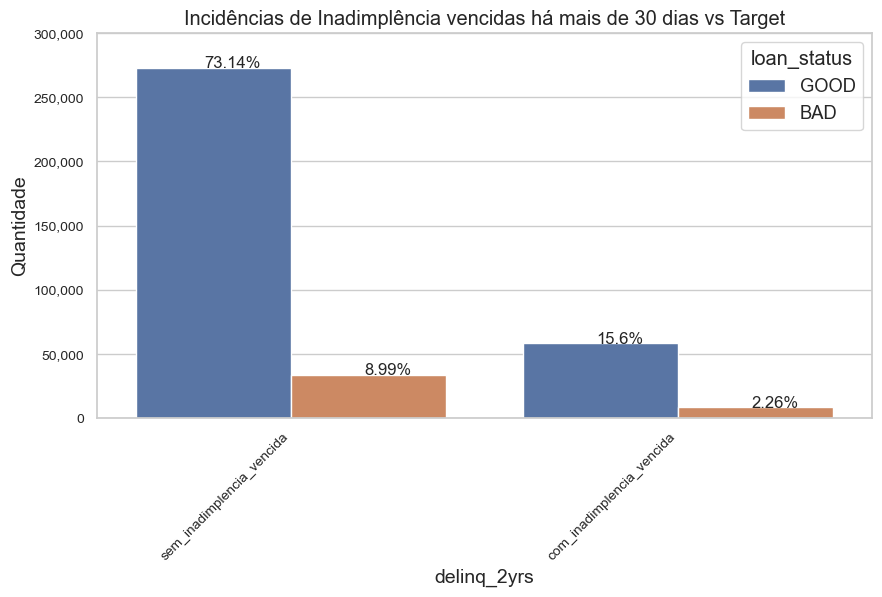

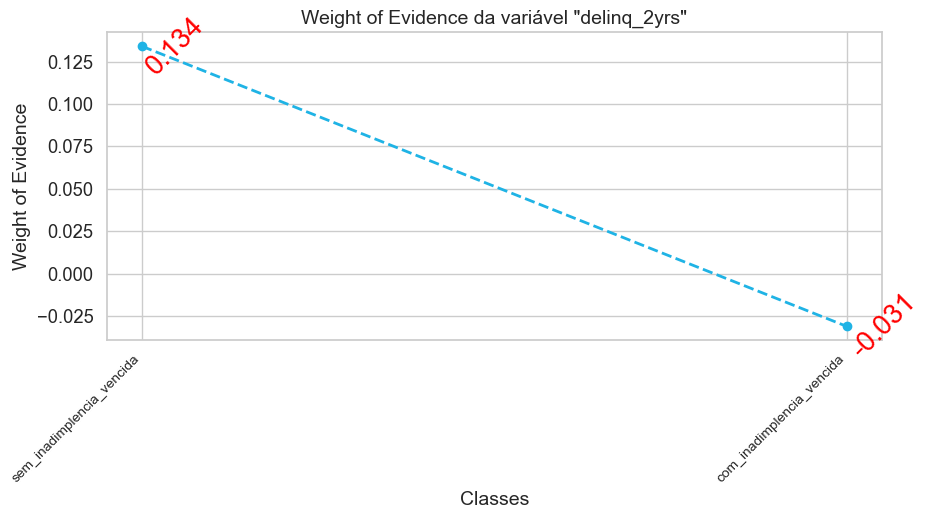

In [25]:
df_aux = df_train[['loan_status', 'delinq_2yrs']].copy()
df_aux[['delinq_2yrs']] = np.where(df_aux[['delinq_2yrs']] == 0, 'sem_inadimplencia_vencida', 'com_inadimplencia_vencida')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'delinq_2yrs', 'loan_status')
plota_barras(['delinq_2yrs'], 'loan_status', df_aux, 1, 1, 'Incidências de Inadimplência vencidas há mais de 30 dias vs Target', 45)
woe(df_aux, 'delinq_2yrs', 'loan_status')

# <font color='green' style='font-size: 30px;'> 2.10) Número de meses desde a contratação do primeiro produto de crédito vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente clientes mais antigos tendem a proporcionar menor risco.

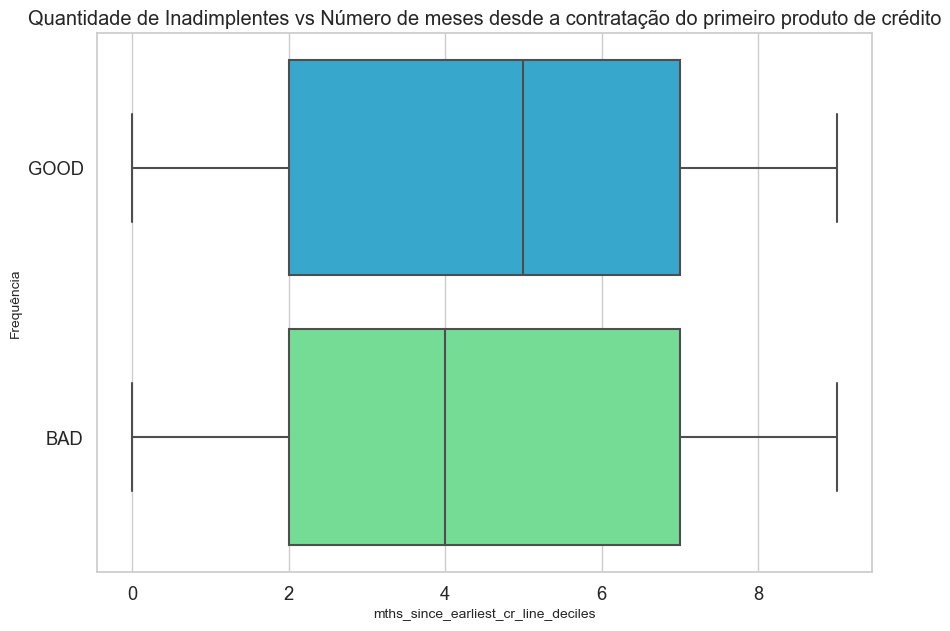

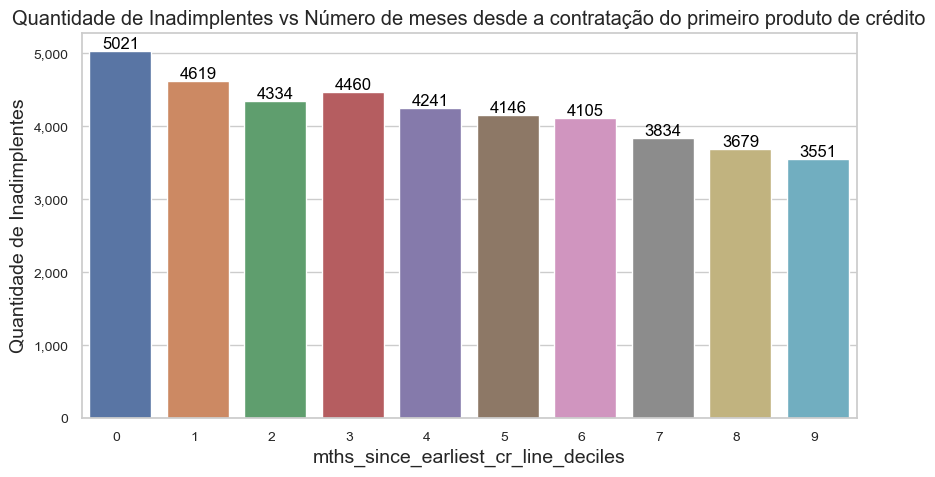

In [17]:
df_aux = df_train[['loan_status', 'earliest_cr_line']].copy()
df_aux['earliest_cr_line'] = pd.to_datetime(df_aux['earliest_cr_line'], format = '%b-%y')
df_aux['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df_aux['earliest_cr_line'])/np.timedelta64(1, 'M')))
df_aux['mths_since_earliest_cr_line'] = df_aux['mths_since_earliest_cr_line'].fillna(df_aux['mths_since_earliest_cr_line'].median())
df_aux['mths_since_earliest_cr_line'] = np.where(df_aux['mths_since_earliest_cr_line'] < 0, df_aux['mths_since_earliest_cr_line'].median(), df_aux['mths_since_earliest_cr_line'])
df_aux['mths_since_earliest_cr_line'] = df_aux['mths_since_earliest_cr_line'].apply(lambda x:int(x))
df_aux['mths_since_earliest_cr_line_deciles'] = transform_to_deciles(df_aux, 'mths_since_earliest_cr_line')
plota_boxplot(['mths_since_earliest_cr_line_deciles'], 'loan_status', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde a contratação do primeiro produto de crédito')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('mths_since_earliest_cr_line_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('mths_since_earliest_cr_line_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'mths_since_earliest_cr_line_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'mths_since_earliest_cr_line_deciles', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a contratação do primeiro produto de crédito')

# <font color='green' style='font-size: 30px;'> 2.11) Número de Meses desde o último Registro público vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente o número de meses desde o último registro público não é uma informação capaz de discriminar clientes bons e ruins

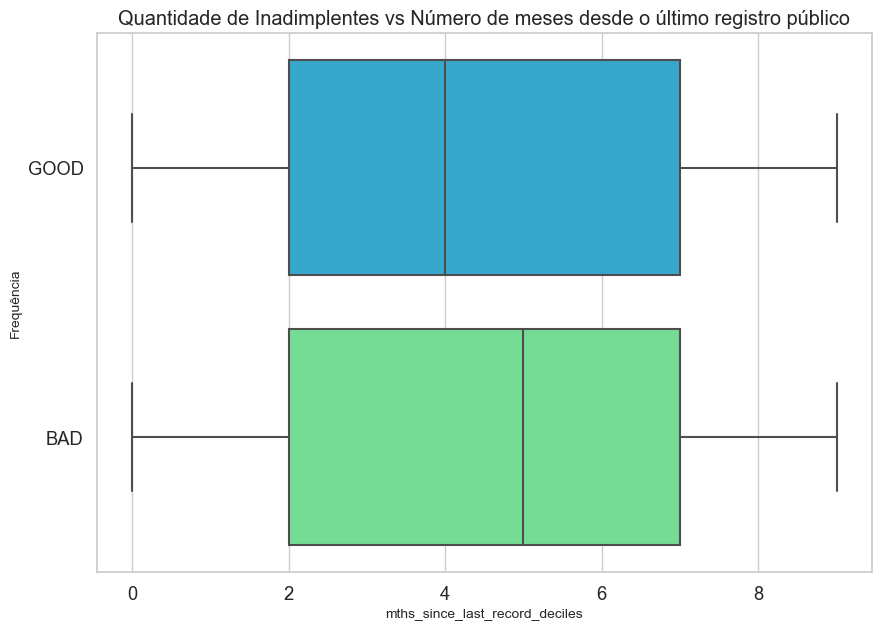

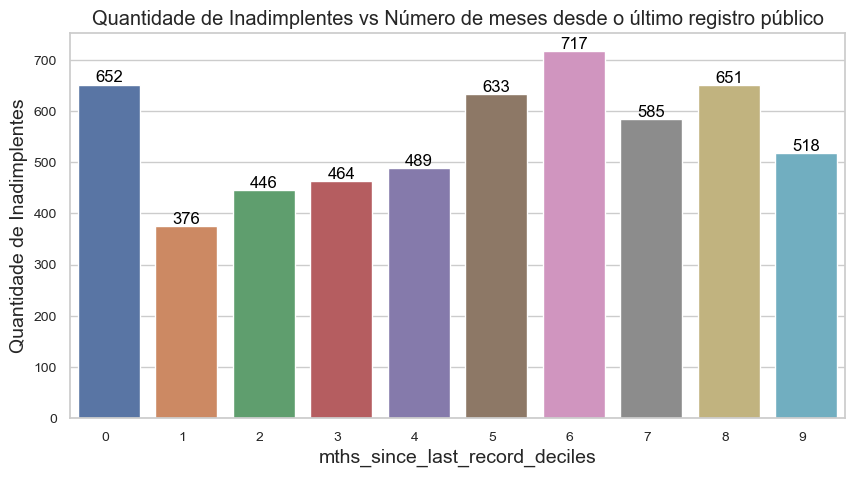

In [18]:
df_aux = df_train[['loan_status', 'mths_since_last_record']].copy()
df_aux.dropna(inplace = True)
df_aux['mths_since_last_record_deciles'] = transform_to_deciles(df_aux, 'mths_since_last_record')
plota_boxplot(['mths_since_last_record_deciles'], 'loan_status', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde o último registro público')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('mths_since_last_record_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('mths_since_last_record_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'mths_since_last_record_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'mths_since_last_record_deciles', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde o último registro público')

# <font color='green' style='font-size: 30px;'> 2.12) Número de Meses desde a classificação mais recente de 90 dias ou menos vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Dentre os clientes com essa informação, aparentemente clientes classificados recentemente aparentam ter maior risco de inadimplência

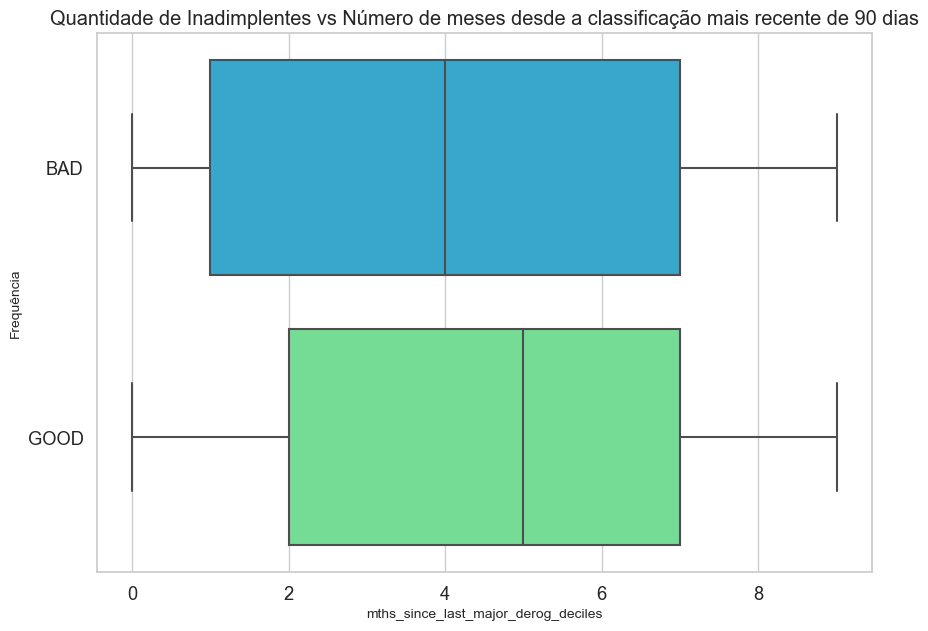

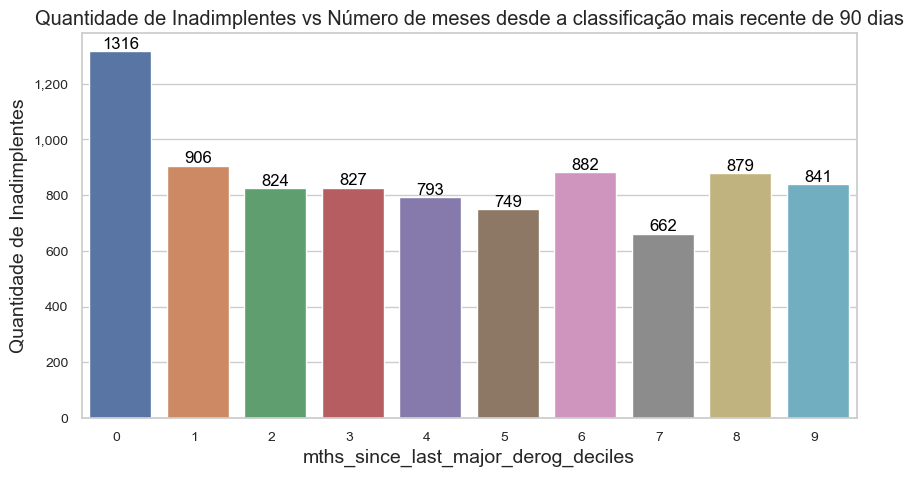

In [19]:
df_aux = df_train[['loan_status', 'mths_since_last_major_derog']].copy()
df_aux.dropna(inplace = True)
df_aux['mths_since_last_major_derog_deciles'] = transform_to_deciles(df_aux, 'mths_since_last_major_derog')
plota_boxplot(['mths_since_last_major_derog_deciles'], 'loan_status', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde a classificação mais recente de 90 dias')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('mths_since_last_major_derog_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('mths_since_last_major_derog_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'mths_since_last_major_derog_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'mths_since_last_major_derog_deciles', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a classificação mais recente de 90 dias')

# <font color='green' style='font-size: 30px;'> 2.13) Número de meses desde a última inadimplência vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente o número de meses desde a última inadimplência não aparenta caráter discriminatório de forma geral, a não ser pelo decil 0.

> 2. No decil 0, há muito mais clientes com inadimplência. Isso se deve talvez pelo fato da própria montagem da Target captar esse efeito para inadimplência recentes e para inadimplências antigas provavelmente o cliente já se recuperou e pode-se realizar negócios novamente com ele

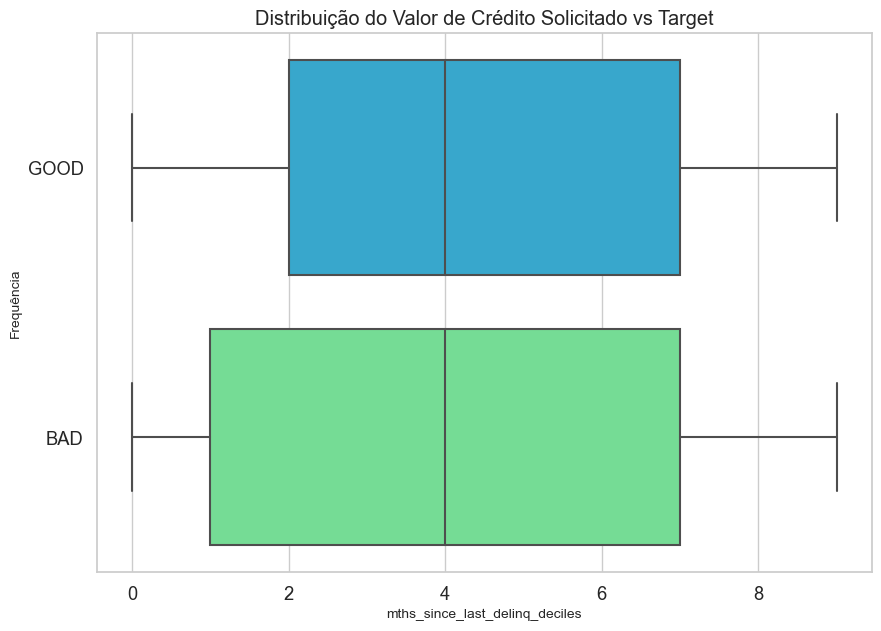

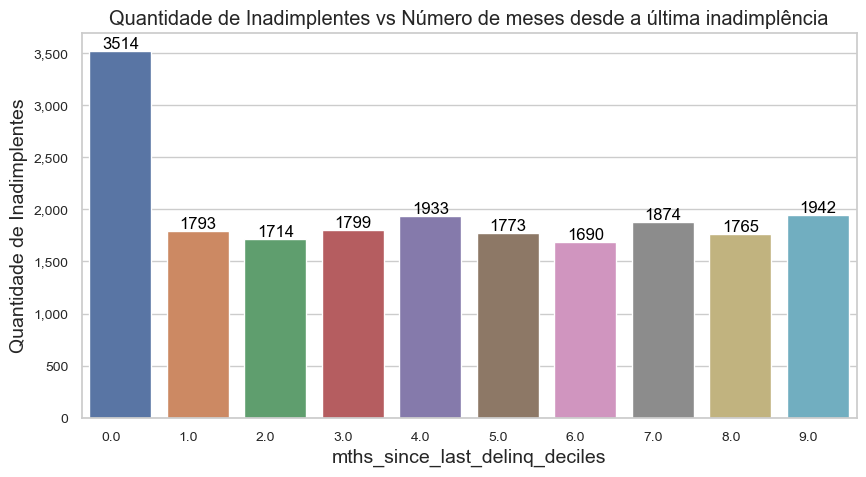

In [20]:
df_aux = df_train[['loan_status', 'mths_since_last_delinq']].copy()
df_aux = df_aux.loc[~df_aux['mths_since_last_delinq'].isnull()]
df_aux['mths_since_last_delinq_deciles'] = transform_to_deciles(df_train, 'mths_since_last_delinq')
plota_boxplot(['mths_since_last_delinq_deciles'], 'loan_status', df_aux, 1, 1, 'Distribuição do Valor de Crédito Solicitado vs Target')

good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('mths_since_last_delinq_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('mths_since_last_delinq_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'mths_since_last_delinq_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'mths_since_last_delinq_deciles', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a última inadimplência')

# <font color='green' style='font-size: 30px;'> 2.14) Comprometimento de Renda vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Pessoas com maior comprometimento de renda (pagamento anual/ganho anual) possuem maior risco de inadimplência

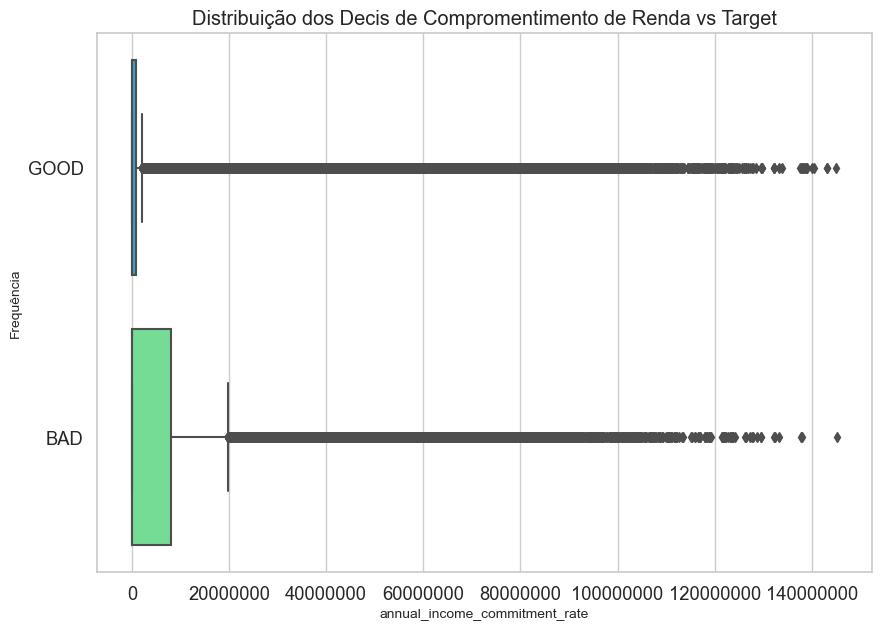

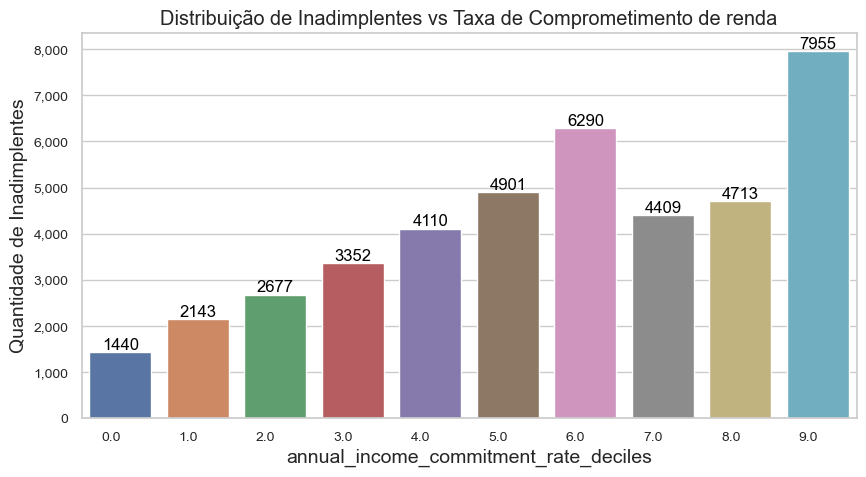

In [21]:
df_aux = df_train[['annual_inc', 'installment', 'loan_amnt', 'term', 'int_rate', 'loan_status']].copy()
df_aux['term'] = np.where(df_aux['term'] == ' 36 months', 3, 5)
df_aux['loan_amnt_with_int_rate'] = calcula_juros_compostos(df_aux['loan_amnt'], df_aux['int_rate'], df_aux['term'])
df_aux['annual_payment'] = df_aux['loan_amnt_with_int_rate']/df_aux['term']
df_aux['annual_income_commitment_rate'] = ((df_aux['annual_payment']/df_aux['annual_inc'])*100).round(2)
df_aux['annual_income_commitment_rate_deciles'] = transform_to_deciles(df_aux, 'annual_income_commitment_rate').fillna(0)
plota_boxplot(['annual_income_commitment_rate'], 'loan_status', df_aux, 1, 1, 'Distribuição dos Decis de Compromentimento de Renda vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'GOOD'].groupby('annual_income_commitment_rate_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['loan_status'] == 'BAD'].groupby('annual_income_commitment_rate_deciles', as_index = False)['loan_status'].count()).rename({'loan_status':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'annual_income_commitment_rate_deciles', how = 'left')
plota_barras_agrupadas(df_aux, 'annual_income_commitment_rate_deciles', 'qt_bad', 'Distribuição de Inadimplentes vs Taxa de Comprometimento de renda')
